# Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [1]:
# Importando Libs
import sys
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("algoritmos/")

## Questão 1

In [ ]:
e ai

## Questão 2

In [ ]:
coé

## Questão 3 - Implemente em uma linguagem de programação a sua escolha os algoritmos de ordenação linear CountingSort e BucketSort. Em seguida, trabalhe os itens abaixo.



In [2]:
from counting_sort import counting_sort
from bucket_sort import bucket_sort

In [122]:
def test_arrays(sort_algorithm, begin=10000, end=110000, increment=10000, iterations=1, 
                constant_high=False, constant_size=False, uniform_dist=True):
    
    steps = (end-begin)//increment
    times = np.zeros((iterations, steps))
    
    for e in range(steps):
        for j in range(iterations):
            high = begin if constant_high else e*increment+begin
            size = begin if constant_size else e*increment+begin
            
            if uniform_dist:
                vetor = np.random.randint(low=0, high = high, size = size)
            else:
                vetor = np.random.pareto(e*increment+begin, e*increment+begin)
            
            times[j,e] = sort_algorithm(vetor)[1]
    x = list(range(begin, end, increment))
    return x, np.median(times, axis=0)

def plot_graph(y, label_x, label_y, title="", x=None, hist=False):
    if hist:
        plt.hist(y, bins=y.shape[0]//100)
    else:
        plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show

### a. Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.


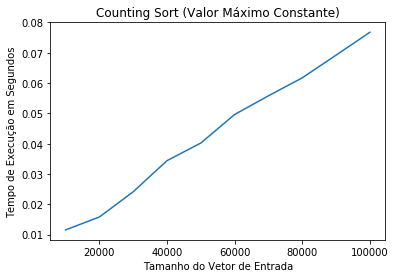

In [28]:
x, time =  test_arrays(counting_sort, iterations=8, constant_high=True)
plot_graph(x=x,y=time,title='Counting Sort (Valor Máximo Constante)', 
           label_x="Tamanho do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o tamanho do vetor de entrada

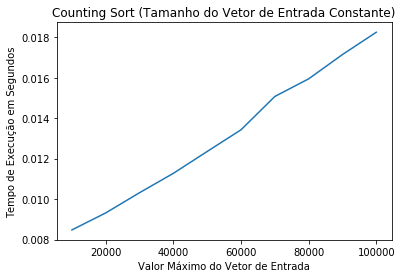

In [42]:
x, time = test_arrays(counting_sort, iterations=8, constant_size=True)
plot_graph(x=x, y=time, title='Counting Sort (Tamanho do Vetor de Entrada Constante)', 
           label_x="Valor Máximo do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o valor máximo do vetor

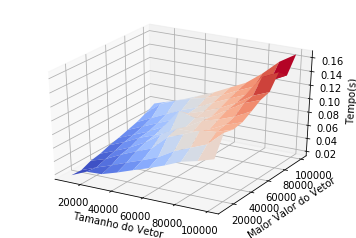

In [121]:
X = np.resize(np.linspace(10**4, 10**5,10,dtype=int), (10,10))
Y = X.transpose(1,0)
Z = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        vetor = np.random.randint(low=0, high = Y[i,j]*4, size = X[i,j])
        Z[i,j] = counting_sort(vetor)[1]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
ax.set_xlabel("Tamanho do Vetor")
ax.set_ylabel("Maior Valor do Vetor")
ax.set_zlabel("Tempo(s)")
plt.show()

###### A partir dos gráficos, é possível confirmar a complexidade temporal do Counting Sort de O(n+k), sendo 'n' o tamanho do vetor de entrada e 'k' o valor máximo do vetor. O tempo de execução do algoritmo aumenta linearmente de acordo tanto com o tamanho do vetor como com o valor máximo do vetor.

### b. Compare o tempo de execução do algoritmo BucketSort quando o mesmo recebe como entrada sequências uniformemente distribuídas. Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

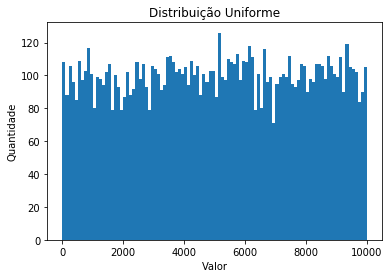

In [125]:
numbers = np.random.uniform(0,10**4,10**4)
plot_graph(numbers, hist=True, title="Distribuição Uniforme", 
              label_x="Valor", label_y="Quantidade")

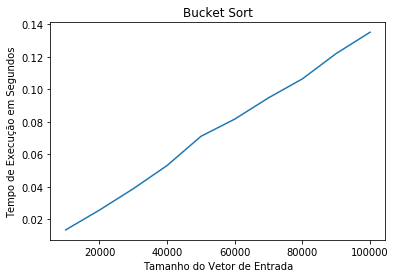

In [68]:
x,time =  test_arrays(bucket_sort, iterations=3)
plot_graph(time,x=x, title="Bucket Sort", label_x="Tamanho do Vetor de Entrada", 
           label_y="Tempo de Execução em Segundos")

######  A complexidade no tempo do algoritmo Bucket Sort é linear, então o tempo de execução vai aumentar proporcionalmente conforme o  o tamanho do vetor de entrada para uma entrada 

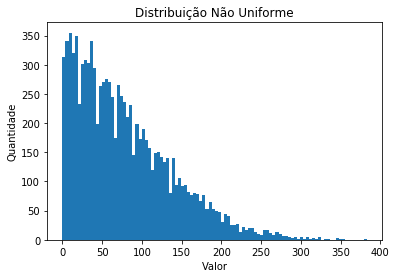

In [126]:
numbers = abs(np.random.normal(scale=100, size=10**4).astype(int))
plot_graph(numbers, hist=True, label_x="Valor", label_y="Quantidade", 
           title="Distribuição Não Uniforme")

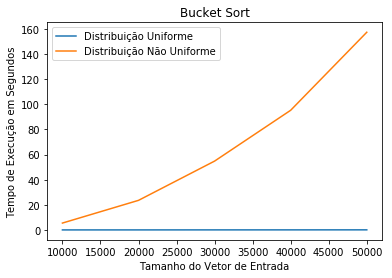

In [124]:
x, time_pareto = test_arrays(bucket_sort, end=60000, iterations=1, uniform_dist=False)
plt.plot(x,time[:5], label="Distribuição Uniforme")
plt.plot(x,time_pareto, label="Distribuição Não Uniforme")
plt.xlabel("Tamanho do Vetor de Entrada")
plt.ylabel("Tempo de Execução em Segundos")
plt.title("Bucket Sort")
plt.legend()
plt.show()

###### Através dos gŕaficos, podemos perceber que o algoritmo Bucket Sort é muito mais eficiente para vetores de entrada que possuem seus valores distribuidos de forma uniforme. 

## Questão 4

In [ ]:
fala